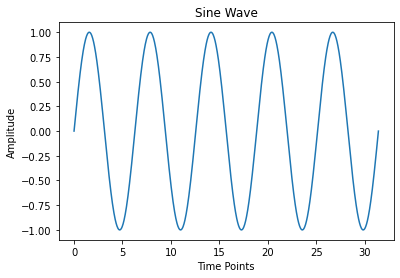

In [10]:
import numpy as np
import matplotlib.pyplot as plt

time_points = np.linspace(0, 10 * np.pi, 1000)  # 10 cycles of a sine wave
sine_wave = np.sin(time_points)

plt.plot(time_points, sine_wave)
plt.xlabel("Time Points")
plt.ylabel("Amplitude")
plt.title("Sine Wave")
plt.show()

In [11]:
def generate_sequences(sequence, seq_length):
    X, y = [], []
    
    for i in range(len(sequence) - seq_length):
        X.append(sequence[i:i+seq_length])
        y.append(sequence[i+seq_length])
        
    return np.array(X), np.array(y)

seq_length = 50
X, y = generate_sequences(sine_wave, seq_length)

# Split the dataset
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for RNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [8]:
X.shape[0]

950

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train on the training set
model.fit(X_train, y_train, epochs=20, verbose=1)



Epoch 1/20
24/24 [==============================] - 1s 39ms/step - loss: 0.1586
Epoch 2/20
24/24 [==============================] - 1s 38ms/step - loss: 0.0051
Epoch 3/20
24/24 [==============================] - 1s 37ms/step - loss: 0.0021
Epoch 4/20
24/24 [==============================] - 1s 36ms/step - loss: 0.0013
Epoch 5/20
24/24 [==============================] - 1s 38ms/step - loss: 8.2226e-04
Epoch 6/20
24/24 [==============================] - 1s 41ms/step - loss: 6.1444e-04
Epoch 7/20
24/24 [==============================] - 1s 40ms/step - loss: 5.1932e-04
Epoch 8/20
24/24 [==============================] - 1s 39ms/step - loss: 4.5871e-04
Epoch 9/20
24/24 [==============================] - 1s 37ms/step - loss: 3.9228e-04
Epoch 10/20
24/24 [==============================] - 1s 41ms/step - loss: 3.3550e-04
Epoch 11/20
24/24 [==============================] - 1s 39ms/step - loss: 2.7462e-04
Epoch 12/20
24/24 [==============================] - 1s 40ms/step - loss: 2.2967e-04
Epoch

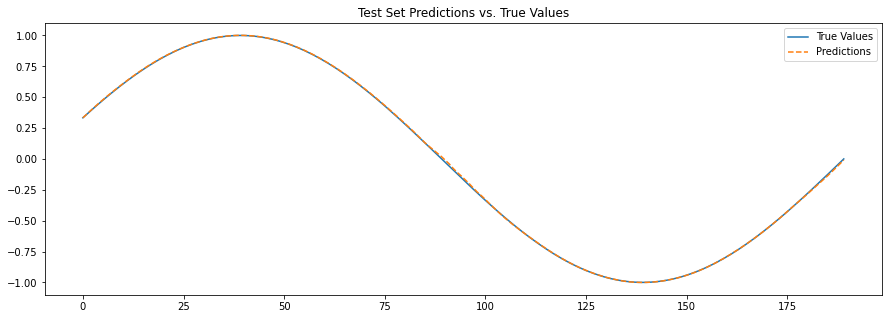

Test MSE: 1.9977908834855018e-05


In [13]:
# Prediction
y_pred = model.predict(X_test)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions', linestyle='dashed')
plt.legend()
plt.title("Test Set Predictions vs. True Values")
plt.show()

# If you want to compute the Mean Squared Error (MSE) on the test set:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

